In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
import numpy as np
import pandas as pd
import pickle

from src.features.sqr import calculate_sqi

# DESARROLLO

In [4]:
sessions = pd.read_parquet('../data/raw/flex_desarrollo_sesiones.parquet')

In [7]:
sessions.head()

,idSesiones,fechaInicio,fechaFin,idPerfil,idImatt,sqr,lecho,notaUsuario,suenios,idUsuario,...,poco_descanso,notas,imagen_hot,wake,rem,nr_1,nr_2,deep,fechaEntrada,idPerfilPadre
0,20,2017-06-29 01:18:47,2017-06-29 07:51:47,NaN,11.0,40.0493,1.0,NaN,None,3.0,...,NaN,0,None,None,None,None,None,None,NaT,0
1,21,2017-06-30 01:29:11,2017-06-30 07:53:34,NaN,11.0,27.3639,1.0,NaN,None,3.0,...,NaN,0,None,None,None,None,None,None,NaT,0
2,22,2017-07-01 01:02:20,2017-07-01 06:15:55,NaN,11.0,40.3763,1.0,NaN,None,3.0,...,NaN,0,None,None,None,None,None,None,NaT,0
3,23,2017-07-01 00:32:46,2017-07-01 08:18:00,NaN,37.0,27.2268,1.0,2.0,None,2.0,...,0.0,0,None,None,None,None,None,None,NaT,0
4,24,2017-07-01 00:32:51,2017-07-01 06:50:36,NaN,37.0,21.9241,2.0,NaN,None,2.0,...,NaN,0,None,None,None,None,None,None,NaT,0


In [8]:
sessions = pd.read_parquet('../data/raw/flex_desarrollo_sesiones.parquet')
movements = pd.read_parquet('../data/raw/flex_desarrollo_movimientos.parquet')

In [8]:
def rename_movement_columns(df):
    old_names = ['fecha', 'presion0', 'presion1', 'presion2', 'presion3', 
                 'presion4', 'presion5', 'presion6', 'presion7', 'presion8',
                 'presion9', 'presion10', 'presion11', 'presion12',
                 'tipoMovimiento']
    new_names = ['timestamp', 'pressure0', 'pressure1', 'pressure2', 
             'pressure3', 'pressure4', 'pressure5', 'pressure6', 
             'pressure7', 'pressure8','pressure9', 'pressure10',
             'pressure11', 'pressure12', 'type']
    
    return df.rename(columns=dict(zip(old_names, new_names)))

In [56]:
movements = rename_movement_columns(movements)

def calculate_new_sqr(session):
    session_movements = movements[movements['idSesion'] == session['idSesiones']]
    return calculate_sqi(session['fechaInicio'], session['fechaInicio'], session_movements)

sessions['sqr'] = sessions.apply(calculate_new_sqr, axis=1)

In [97]:
sessions.to_parquet('../data/processed/sessions_new_sqr_flex_desarrollo.parquet')

In [80]:
sessions.shape

(27365, 25)

In [79]:
sessions['sqr'][sessions['sqr'] < 100].shape

(22439,)

<AxesSubplot:>

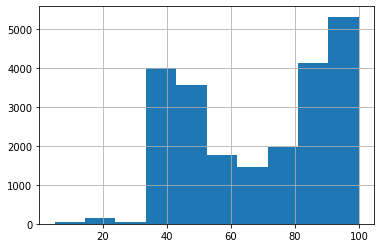

In [81]:
sessions['sqr'][sessions['sqr'] < 100].hist()

In [95]:
sessions_gt_7 = sessions[(sessions['fechaFin'] - sessions['fechaEntrada']) > pd.Timedelta(hours=7)]
sessions_gt_7.shape

(608, 25)

<AxesSubplot:>

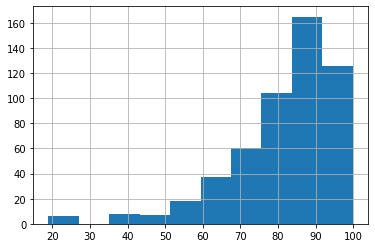

In [96]:
sessions_gt_7['sqr'][sessions_gt_7['sqr'] < 100].hist()

# PRO

In [5]:
sessions = pd.read_parquet('../data/raw/flex_sesiones.parquet')
movements = pd.read_parquet('../data/raw/flex_movimientos.parquet')

In [9]:
movements = rename_movement_columns(movements)
# sessions_gt_7 = sessions[(sessions['fechaFin'] - sessions['fechaInicio']) > pd.Timedelta(hours=7)]
sessions_gt_7.shape

(35773, 24)

In [10]:
def calculate_new_sqr(session):
    session_movements = movements[movements['idSesion'] == session['idSesiones']]
    return calculate_sqi(session['fechaEntrada'], session['fechaInicio'], session_movements)

sessions_gt_7['sqr'] = sessions_gt_7.apply(calculate_new_sqr, axis=1)

/home/cegf/.virtualenvs/DESCANSARE_ANAL/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [11]:
sessions_gt_7.to_parquet('../data/processed/sessions_new_sqr_flex.parquet')
# sessions_gt_7 = pd.read_parquet('../data/processed/sessions_new_sqr_flex.parquet')

<AxesSubplot:>

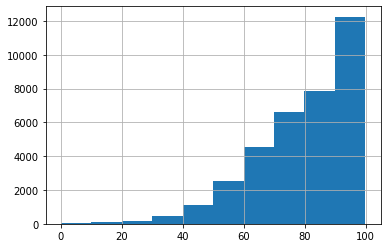

In [12]:
sessions_gt_7['sqr'][sessions_gt_7['sqr'] < 100].hist()

<AxesSubplot:>

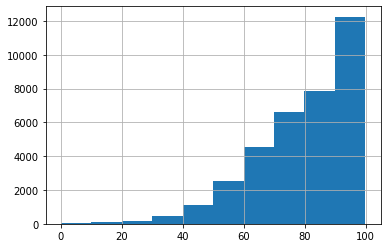

In [119]:
sessions_gt_7['sqr'].hist()

In [120]:
print(sessions_gt_7['sqr'][sessions_gt_7['sqr'] < 100].shape)
print(sessions_gt_7['sqr'].shape)

(35773,)
(35773,)


In [121]:
sessions_gt_7[sessions_gt_7['sqr'] > 100]

,idSesiones,fechaInicio,fechaFin,idPerfil,idImatt,sqr,lecho,notaUsuario,suenios,idUsuario,...,dia_estres,poco_descanso,notas,imagen_hot,wake,rem,nr_1,nr_2,deep,fechaEntrada


In [122]:
sessions_gt_7[sessions_gt_7['idSesiones'] == 26732]

,idSesiones,fechaInicio,fechaFin,idPerfil,idImatt,sqr,lecho,notaUsuario,suenios,idUsuario,...,dia_estres,poco_descanso,notas,imagen_hot,wake,rem,nr_1,nr_2,deep,fechaEntrada
22981,26732,2019-05-04 23:57:57,2019-05-05 09:03:35,22.0,319.0,96.405491,1.0,NaN,None,2.0,...,NaN,NaN,None,None,None,None,None,None,None,2019-05-04 23:42:58


In [23]:
movements[movements['idSesion'] == 26732]

,idMovimientos,timestamp,idSesion,pressure1,pressure2,pressure3,pressure4,pressure5,pressure6,pressure7,pressure8,pressure9,pressure10,pressure11,pressure12,type
1284732,1462231,2019-05-05 01:09:29,26732,12,0,41,46,42,13,14,19,0,0,40,25,LIGHT
1284733,1462232,2019-05-05 01:09:31,26732,12,0,41,46,42,13,14,18,0,0,41,32,LIGHT
1284734,1462233,2019-05-05 01:42:42,26732,11,0,44,51,44,14,14,20,0,0,41,26,MEDIUM_2
1284735,1462234,2019-05-05 01:42:44,26732,10,0,44,51,44,14,14,20,0,0,40,26,MEDIUM_2
1284736,1462235,2019-05-05 01:43:07,26732,10,0,44,51,44,14,14,20,0,0,41,26,LIGHT
1284737,1462236,2019-05-05 01:43:09,26732,11,0,44,51,44,15,14,20,0,0,41,26,LIGHT
1284738,1462237,2019-05-05 02:11:56,26732,11,0,44,52,46,16,16,30,0,0,38,18,LIGHT
1284739,1462238,2019-05-05 02:11:58,26732,11,0,44,51,45,16,16,29,0,0,38,18,LIGHT
1284740,1462239,2019-05-05 02:48:46,26732,11,0,44,50,47,16,12,25,0,0,40,20,LIGHT
1284741,1462240,2019-05-05 02:48:48,26732,11,0,44,50,47,17,12,25,0,0,40,20,LIGHT


In [10]:
sessions = pd.read_parquet('../data/raw/flex_sesiones.parquet')
movements = pd.read_parquet('../data/raw/flex_movimientos.parquet')

In [11]:
movements = rename_movement_columns(movements)

In [12]:
def calculate_new_sqr(session):
    session_movements = movements[movements['idSesion'] == session['idSesiones']]
    return calculate_sqi(session['fechaEntrada'], session['fechaInicio'], session_movements)

sessions['sqr'] = sessions.apply(calculate_new_sqr, axis=1)

In [14]:
sessions.to_parquet('../data/processed/sessions_new_sqr_flex_not_filtered.parquet')
# sessions_gt_7 = pd.read_parquet('../data/processed/sessions_new_sqr_flex.parquet')

In [16]:
sessions[(sessions['fechaFin'] - sessions['fechaEntrada']) < pd.Timedelta(hours=7)]

,idSesiones,fechaInicio,fechaFin,idPerfil,idImatt,sqr,lecho,notaUsuario,suenios,idUsuario,...,dia_estres,poco_descanso,notas,imagen_hot,wake,rem,nr_1,nr_2,deep,fechaEntrada
22188,25844,2019-04-26 00:38:06,2019-04-26 07:04:17,22.0,319.0,84.093491,1.0,NaN,None,2.0,...,NaN,NaN,None,None,None,None,None,None,None,2019-04-26 00:30:53
22190,25846,2019-04-26 07:27:27,2019-04-26 07:33:29,23.0,319.0,36.804444,2.0,NaN,None,2.0,...,NaN,NaN,None,None,None,None,None,None,None,2019-04-26 07:27:27
22265,25936,2019-04-27 02:37:29,2019-04-27 04:56:41,4184.0,348.0,51.133467,1.0,NaN,None,32.0,...,NaN,NaN,None,None,None,None,None,None,None,2019-04-27 02:32:07
22266,25937,2019-04-27 06:21:43,2019-04-27 07:13:48,4184.0,348.0,22.164778,1.0,NaN,None,32.0,...,NaN,NaN,None,None,None,None,None,None,None,2019-04-27 05:43:49
22267,25938,2019-04-27 02:59:27,2019-04-27 03:35:25,4286.0,348.0,26.733151,2.0,NaN,None,32.0,...,NaN,NaN,None,None,None,None,None,None,None,2019-04-27 02:29:28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85003,95904,2020-07-04 08:57:55,2020-07-04 09:38:53,7260.0,939.0,37.403889,2.0,NaN,None,1248.0,...,NaN,NaN,None,None,None,None,None,None,None,2020-07-04 08:09:13
85004,95905,2020-07-07 04:25:37,2020-07-07 06:45:52,7260.0,939.0,36.585480,2.0,NaN,None,1248.0,...,NaN,NaN,None,None,None,None,None,None,None,2020-07-07 04:10:08
85005,95906,2020-07-09 01:04:01,2020-07-09 03:24:21,7260.0,939.0,38.702200,2.0,NaN,None,1248.0,...,NaN,NaN,None,None,None,None,None,None,None,2020-07-09 00:50:00
85006,95907,2020-07-10 00:20:32,2020-07-10 01:45:07,7260.0,939.0,19.026389,2.0,NaN,None,1248.0,...,NaN,NaN,None,None,None,None,None,None,None,2020-07-10 00:08:51
